In [32]:
import matplotlib.pyplot as plt
import numpy as np

output = np.loadtxt("output.txt")
output_A = np.loadtxt("output_A.txt")
output_t = np.loadtxt("output_t.txt")

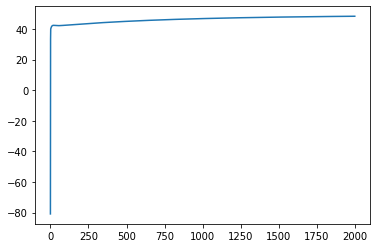

In [33]:
plt.plot(output[0:2000,1])

In [34]:
len(output)

2001

Text(0.5, 1.0, 'VOI')

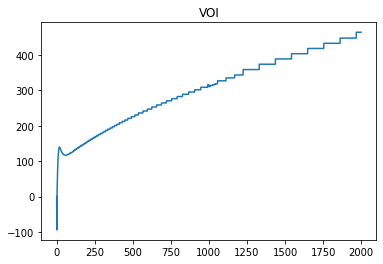

In [35]:
start = 0
stop = 2000
plt.plot(output_A[start:stop,20])
plt.title("VOI")

In [39]:
output_t

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.998e+03, 1.999e+03,
       2.000e+03])

Text(0.5, 1.0, 'INa ONa channel variable')

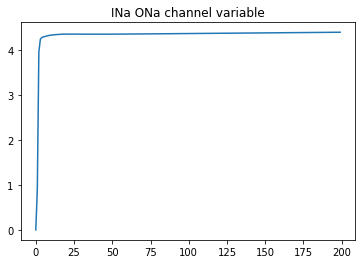

In [38]:
start = 0
stop = 200
plt.plot(output_t[start:stop], output[start:stop,37])
plt.title("INa ONa channel variable")

Text(0.5, 1.0, 'INa CNa1 channel variable')

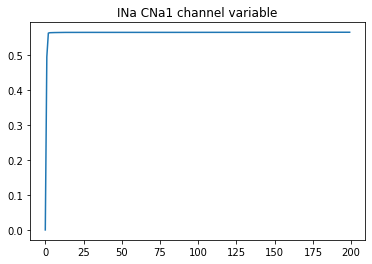

In [18]:
start = 0
stop = 200
plt.plot(output[start:stop,22])
plt.title("INa CNa1 channel variable")

Text(0.5, 1.0, 'INa IFNa channel variable')

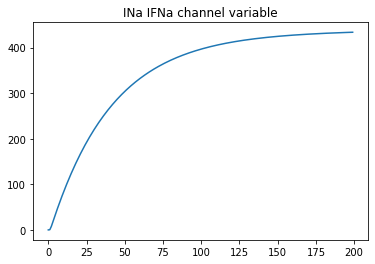

In [19]:
start = 0
stop = 200
plt.plot(output[start:stop,38])
plt.title("INa IFNa channel variable")

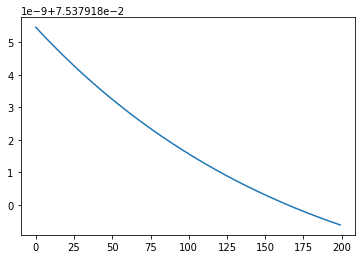

In [22]:
start = 0
stop = 200
plt.plot(output[start:stop,83])
#plt.title("concentration of catalytic subunit of PKA in caveolae")

Text(0.5, 1.0, 'INa ONap channel variable')

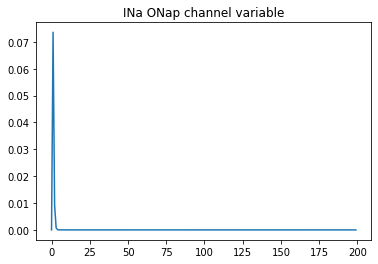

In [25]:
start = 0
stop = 200
plt.plot(output[start:stop,123])
plt.title("INa ONap channel variable")

Text(0.5, 1.0, 'INa I1Na channel variable')

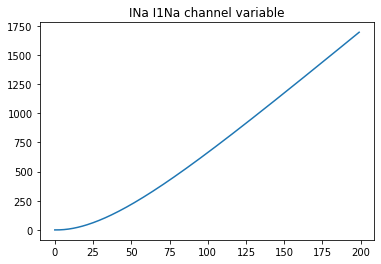

In [28]:
start = 0
stop = 200
plt.plot(output[start:stop,39])
plt.title("INa I1Na channel variable")

Text(0.5, 1.0, 'Na intracellular concentration')

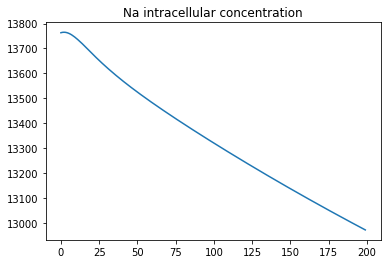

In [31]:
start = 0
stop = 200
plt.plot(output[start:stop,23])
plt.title("Na intracellular concentration")

In [47]:
plt.scatter(ito_block_100_13[:,0], ito_block_100_13[:,2])

NameError: name 'ito_block_100_13' is not defined

In [99]:
np.array(ito_block_100_13[:,2])

array([0.0927903, 0.0927903, 0.0927903, ..., 0.224579 , 0.224584 ,
       0.224595 ])

In [18]:
max_pot = 10
min_pot = -80
delta = max_pot - min_pot
levels = max_pot - 0.01* delta * np.array([20,30,40,50,60,70,80,90])
levels

array([ -8., -17., -26., -35., -44., -53., -62., -71.])

In [51]:
def calc_APDs(time, potential, levels):
    max_pot = max(potential)
    min_pot = min(potential)
    delta = max_pot-min_pot
    levels = max_pot - 0.01*delta * np.array(levels)
    APDs = []
    for x in levels:
        start = -1
        stop = -1
        for t in range(len(time)):
            if start == -1 and potential[t] > x:
                start = time[t]
            if start != -1 and stop == -1 and potential[t] < x:
                stop = time[t]
        APDs.append(stop-start)
    return(APDs)

In [52]:
levels = [10,20,30,40,50,60,70,80,90]
control_APDs = calc_APDs(control[:,0], control[:,1], levels)
ito_block_APDs = calc_APDs(ito_block[:,0], ito_block[:,1], levels)

In [53]:
print("CONTROL")
for x,y in enumerate(levels):
    print("APD", y, " = ", "{:.2f}".format(control_APDs[x]), "ms")

CONTROL
APD 10  =  2.00 ms
APD 20  =  2.50 ms
APD 30  =  3.50 ms
APD 40  =  4.50 ms
APD 50  =  6.00 ms
APD 60  =  11.50 ms
APD 70  =  22.40 ms
APD 80  =  35.40 ms
APD 90  =  46.40 ms


In [54]:
print("ITO_BLOCK")
for x,y in enumerate(levels):
    print("APD", y, " = ", "{:.2f}".format(ito_block_APDs[x]), "ms")

ITO_BLOCK
APD 10  =  2.50 ms
APD 20  =  3.50 ms
APD 30  =  5.00 ms
APD 40  =  6.50 ms
APD 50  =  9.50 ms
APD 60  =  15.40 ms
APD 70  =  23.40 ms
APD 80  =  34.40 ms
APD 90  =  44.40 ms


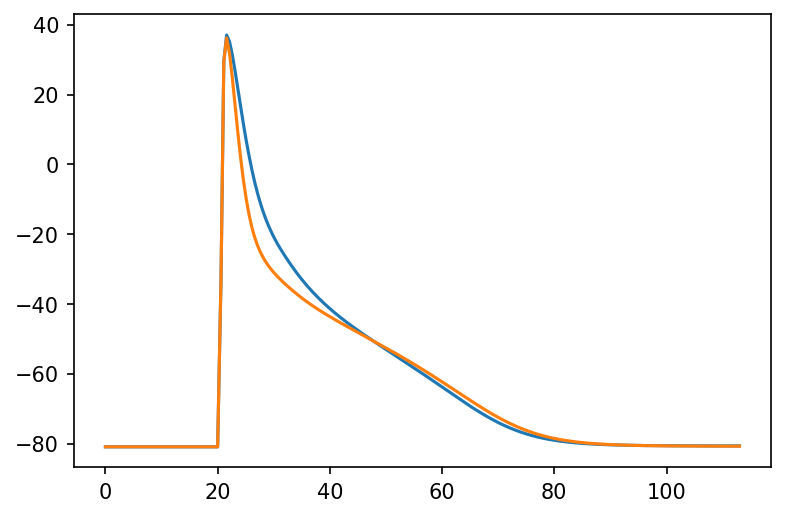

In [82]:
plt.figure(dpi = 150)
plt.plot(control[:,0],control[:,1])
plt.plot(another[:,0],another[:,1])